In [58]:
import pandas as pd
import numpy as np 
import seaborn as sns

# 1 - Mamogram dataset

In [2]:
data_m =  pd.read_csv("mammogram_dataset.csv")

In [4]:
data_m

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


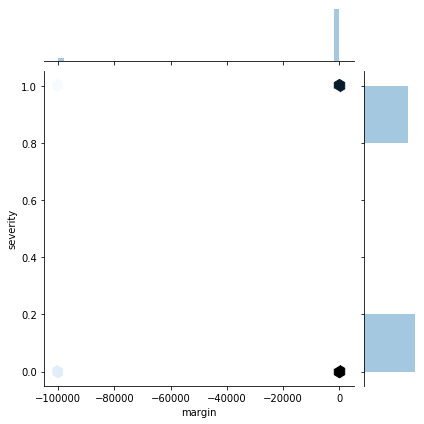

In [63]:
sns.jointplot(x = 'margin',y = 'severity', data = data_m ,kind ='hex')


In [37]:
data1 = data_m.to_numpy()
#data1
data_try1 = data1
data_try1 = data1[: , 1:-1]

In [38]:
x = data_try1[:,:-1]
y = data_try1[:, -1]

- it looks like it's classification problem

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 1 - Naive Baye's

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [41]:
score = gnb.score(x_test,y_test)
print("The score of naive bay's is :  " + str(score))

The score of naive bay's is :  0.11320754716981132


# 2 - SVM

In [42]:
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
score = clf.score(x_test,y_test)
print("The score SVM is :  " + str(score))

The score SVM is :  0.8176100628930818


# 3 - Logistic Regression 


In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)
clf.predict(x_test)
clf.score(x_test,y_test)

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.22641509433962265

# 4 - DecisionTree

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, x_train , y_train, cv=10)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print("The score DT is :  " + str(score))

The score DT is :  0.7264150943396226


# 5 - Knn


In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train) 
neigh.score(x_test,y_test)

0.6194968553459119

# 6 - Random Forest


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=24)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.8176100628930818

- half conclsuion first col is misleading it distact the model.

In [64]:
x = data_try1[:,:-2]
y = data_try1[:,-1]


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=300)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
score = gnb.score(x_test,y_test)
print("The score of naive bay's is :  " + str(score))

from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
score = clf.score(x_test,y_test)
print("The score SVM is :  " + str(score))

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=10, solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)
clf.predict(x_test)
print( "The score logistic regression is" + str( clf.score(x_test,y_test)))

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, x_train , y_train, cv=10)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print("The score DT is :  " + str(score))

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train) 
print(" the score of knn is " + str(neigh.score(x_test,y_test)))


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=300)
clf.fit(x_train, y_train)
print( " THe score of RF " + str(clf.score(x_test,y_test)))


The score of naive bay's is :  0.0440251572327044
The score SVM is :  0.8522012578616353
The score logistic regression is0.8522012578616353
The score DT is :  0.7704402515723271
 the score of knn is 0.6729559748427673
 THe score of RF 0.8522012578616353


c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
